In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [5]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [6]:
df.columns=df.columns.str.strip()

In [7]:
df=df.drop(['day','month','year'],axis=1)

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [9]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [10]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [11]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  245 non-null    object
 1   RH           245 non-null    object
 2   Ws           245 non-null    object
 3   Rain         245 non-null    object
 4   FFMC         245 non-null    object
 5   DMC          245 non-null    object
 6   DC           245 non-null    object
 7   ISI          245 non-null    object
 8   BUI          245 non-null    object
 9   FWI          245 non-null    object
 10  Classes      247 non-null    int64 
dtypes: int64(1), object(10)
memory usage: 21.4+ KB


In [13]:
df.isnull().sum()

Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        0
dtype: int64

In [14]:
df[['Temperature', 'RH', 'Ws','Rain','FFMC']] = df[['Temperature', 'RH', 'Ws','Rain','FFMC']].apply(pd.to_numeric, errors='coerce')
df[['DMC', 'DC', 'ISI','BUI','FWI']] = df[['DMC', 'DC', 'ISI','BUI','FWI']].apply(pd.to_numeric, errors='coerce')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    float64
 1   RH           244 non-null    float64
 2   Ws           244 non-null    float64
 3   Rain         244 non-null    float64
 4   FFMC         244 non-null    float64
 5   DMC          244 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          244 non-null    float64
 8   BUI          244 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      247 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 21.4 KB


In [16]:
# Replace NaN values with a specific integer value (e.g., 0)
df.fillna(0, inplace=True)

# Convert the columns to integer data type
df[['Temperature', 'RH', 'Ws']] = df[['Temperature', 'RH', 'Ws']].astype(int)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  247 non-null    int64  
 1   RH           247 non-null    int64  
 2   Ws           247 non-null    int64  
 3   Rain         247 non-null    float64
 4   FFMC         247 non-null    float64
 5   DMC          247 non-null    float64
 6   DC           247 non-null    float64
 7   ISI          247 non-null    float64
 8   BUI          247 non-null    float64
 9   FWI          247 non-null    float64
 10  Classes      247 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 21.4 KB


In [18]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [19]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [20]:
df.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [21]:
df.dropna(inplace=True)

In [22]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [23]:
corr=df.corr()

<AxesSubplot: >

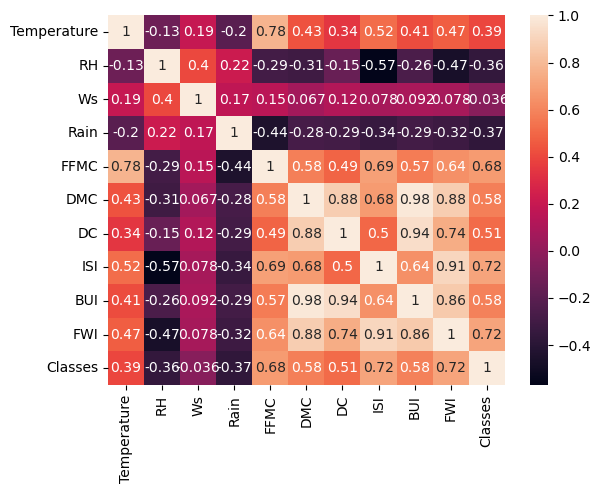

In [24]:
sns.heatmap(corr,annot=True)

Text(0.5, 1.0, 'Histogram of DataFrame')

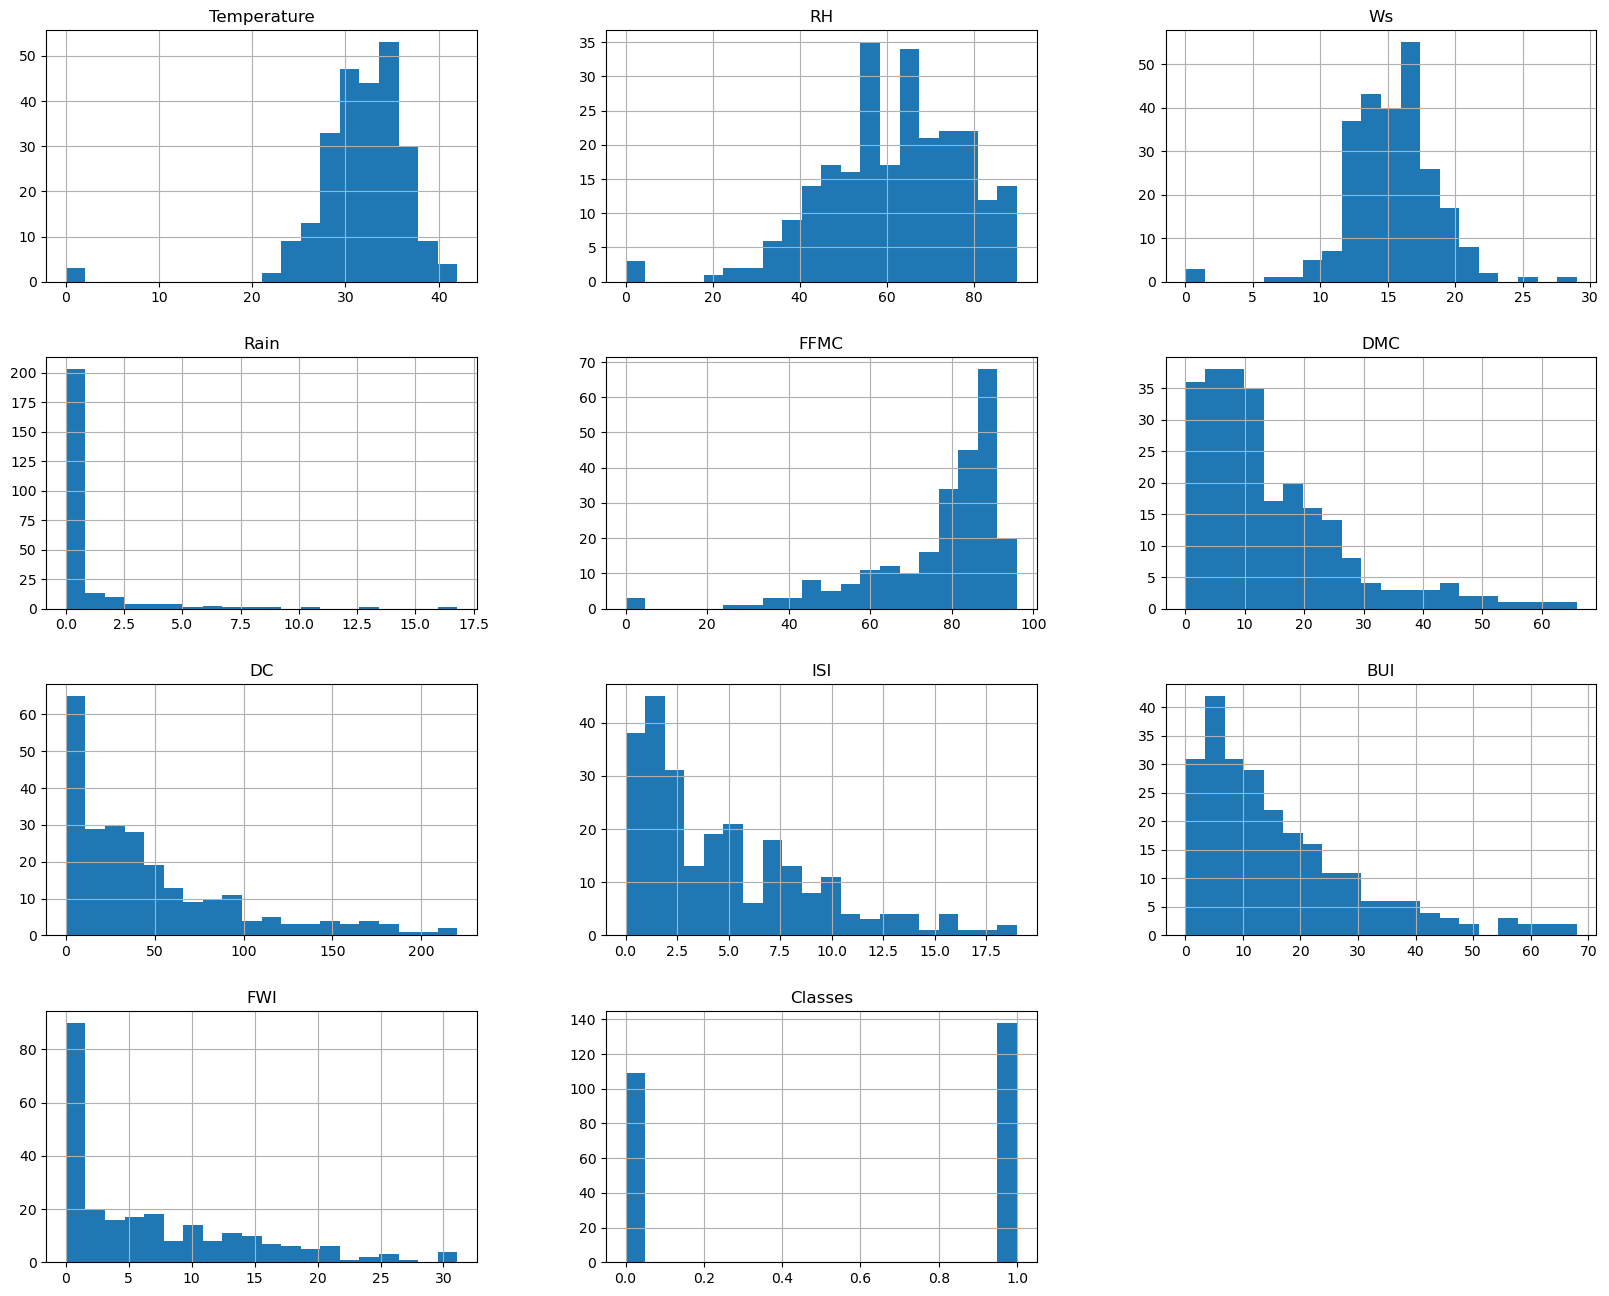

In [25]:
#plt.figure(figsize=(10,8))
df.hist(bins=20,figsize=(20,16))  # Adjust the number of bins as needed
plt.title('Histogram of DataFrame')

In [30]:
#Find out the independent features that are correlated more than 95%

correlation_matrix = df.corr()

# Find pairs of independent features with correlation greater than 95%
high_corr_pairs = []
n_features = len(df.columns)
for i in range(n_features):
    for j in range(i+1, n_features):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))


In [31]:
print(high_corr_pairs)

[('DMC', 'BUI')]


In [33]:
df.drop('BUI',axis=1)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,0.5,0
...,...,...,...,...,...,...,...,...,...,...
242,30,65,14,0.0,85.4,16.0,44.5,4.5,6.5,1
243,28,87,15,4.4,41.1,6.5,8.0,0.1,0.0,0
244,27,87,29,0.5,45.9,3.5,7.9,0.4,0.2,0
245,24,54,18,0.1,79.7,4.3,15.2,1.7,0.7,0


In [35]:
X=df[['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','FWI']]

In [36]:
y=df['Classes']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [39]:
X_train.shape

(197, 9)

STANDARD SCALING

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
Scaler=StandardScaler()

In [42]:
X_train=Scaler.fit_transform(X_train)

In [43]:
X_test=Scaler.transform(X_test)

In [44]:
X_train

array([[ 0.38542227, -1.1350913 , -0.06701967, ..., -0.84039909,
        -0.60589805, -0.63756587],
       [ 0.20113055, -1.43727102,  0.24002393, ...,  2.42700209,
         1.89514939,  2.98230429],
       [-0.16745288,  0.31537131, -1.29519409, ..., -0.50274705,
        -0.19288104, -0.39280597],
       ...,
       [-1.27320317,  0.91973074,  0.54706754, ..., -0.86098763,
        -1.06480584, -0.90808998],
       [ 1.30688085,  0.19449943, -1.9092813 , ..., -0.6880439 ,
        -0.85829733, -0.83079738],
       [-0.35174459,  0.98016668,  1.77524196, ..., -0.84245794,
        -0.85829733, -0.88232578]])

<AxesSubplot: >

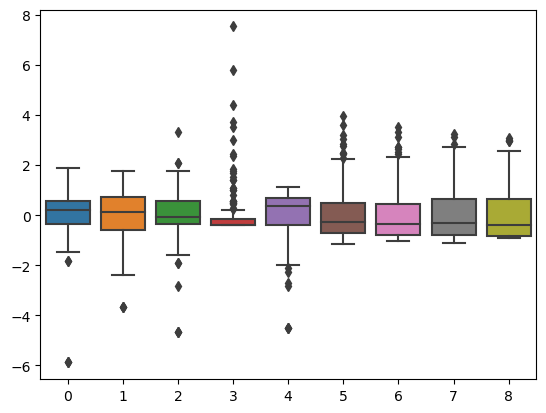

In [45]:
sns.boxplot(data=X_train)

all have scaled in a some range

Linear Regression Model:

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Regressor=LinearRegression()
Regressor.fit(X_train,y_train)
y_pred=Regressor.predict(X_test)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

In [47]:
print(mae,score)

0.23701218462453283 0.6844988146467847


Lasso Regression:

In [54]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

In [55]:
print(mae,score)

0.49492385786802034 -0.0022141136394104866


Ridge Regression:

In [56]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

In [57]:
print(mae,score)

0.2383328743130509 0.6861468084085234


Elastic Net Regression:

In [59]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Elastic=ElasticNet()
Elastic.fit(X_train,y_train)
y_pred=Elastic.predict(X_test)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

In [60]:
print(mae,score)

0.49492385786802034 -0.0022141136394104866


#From all above regression Ridge regression is the best...